<a href="https://colab.research.google.com/github/tooflesswulf/SpSgOoP/blob/master/gooop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.signal import savgol_filter, find_peaks

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Changed this to loopless, should be 3x faster. -Albert
t, x, y = np.loadtxt('/content/data.csv', skiprows=1, delimiter=',').T

(30.0, 70.0)

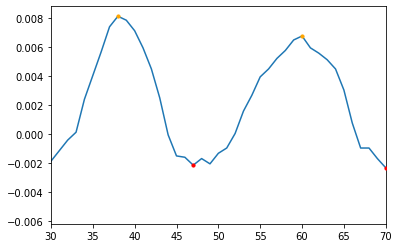

In [ ]:
# TODO: subframe (centroid) peak estimation
pospks, poshdr = find_peaks(x, width=5)
negpks, neghdr = find_peaks(-x, width=5)

plt.plot(x)
plt.scatter(pks, x[pks], c='orange', s=10, zorder=5)
plt.scatter(negpks, x[negpks], c='red', s=10, zorder=5)
plt.xlim([30, 70])  # comment this to see whole plot

(70.0, 170.0)

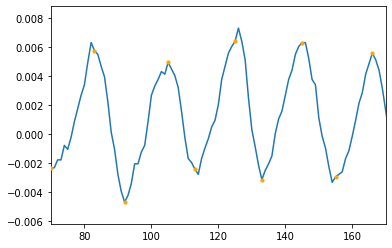

In [ ]:
xeff = x - np.mean(x)
# I'm not sure you should use filtered data to do peak finding, since that
#  adds an offset term dependent on slope of the surroundings.
#  See plot below. (true peak +/- 2 timesteps)
xsg = savgol_filter(xeff, 11, 2)
xanal = abs(xsg)

peaks = find_peaks(xanal)[0]
plt.plot(x)
plt.scatter(peaks, x[peaks], c='orange', s=10, zorder=5)
plt.xlim([70, 170])  # comment this to see whole plot

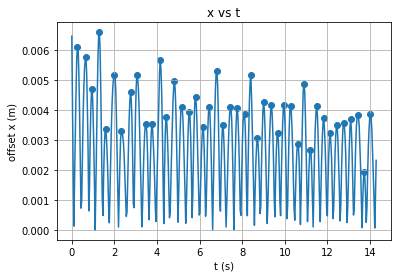

In [ ]:
# Not sure why you're using smoothed & 
tpeaks = t[peaks]
xpeaks = xanal[peaks]

fig, ax = plt.subplots()
plt.plot(t,xanal)
plt.scatter(tpeaks, xpeaks)
ax.grid()
ax.set_title('x vs t')
ax.set_xlabel('t (s)')
ax.set_ylabel('offset x (m)')
plt.show()

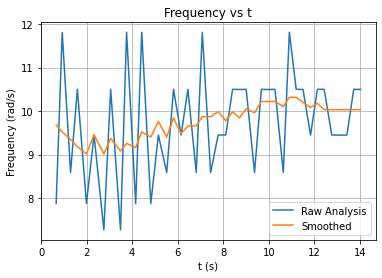

In [ ]:
# This frequency analysis is wrong im pretty sure.
# You combine pos & neg peaks, and the osc. appear not to be symmetric.
T = (2) * (np.subtract(tpeaks, ((np.insert(tpeaks, 0, 0))[:-1])))[1:]
OmegaRaw = np.divide(2 * np.pi, T)
Omega = savgol_filter(OmegaRaw, 9, 1)
tcorr = tpeaks[1:]

fig, ax = plt.subplots()
plt.plot(tcorr,OmegaRaw, label = 'Raw Analysis')
plt.plot(tcorr,Omega, label = 'Smoothed')
plt.legend(loc = 'best')
ax.grid()
ax.set_title('Frequency vs t')
ax.set_xlabel('t (s)')
ax.set_ylabel('Frequency (rad/s)')
plt.show()

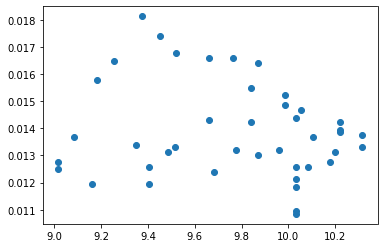

In [ ]:
yeff = y[peaks][1:]
plt.scatter(Omega, yeff)